# Supplementary Figure - REINFORCE Sweep Across Number of Units

June 26, 2022

For these simulations, I apply REINFORCE to recurrent units. Noise is chosen to be 25 dimensional.

Code is motivated by `Fig5-Nonisotropic-2022-5-17.ipynb`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator,FixedFormatter
import matplotlib.pylab as pylab

# analysis
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.linear_model import LinearRegression
from scipy import interpolate # don't import stats
from scipy import linalg as LA
from scipy.ndimage.filters import uniform_filter1d

# miscellaneous
from tqdm import tqdm
from itertools import cycle
from copy import deepcopy
import pickle

import logging
import warnings
import dataclasses
from dataclasses import dataclass
from typing import Optional, List

import sys
sys.path.append("../..")

In [2]:
from rnn import RNNparams, RNN
from task import Task
from simulation import Simulation
from algorithms.bptt import BPTT
from algorithms.rflo import RFLO
from algorithms.reinforce import REINFORCE
from algorithms.track_vars import TrackVars

from utils.plotting import plot_trained_trajectories, paper_format
from utils.metric import cos_sim, return_norm_and_angle
from utils.functions import choose_aligned_matrix

from utils.metric import cos_sim, flow_field_data, flow_field_predicted, calculate_flow_field_correlation


In [3]:
folder = 'figs-2022-6-26/'

In [4]:
trial_duration = 20
n_in=4
frac_on = 0.2

x_tonic = 0.0*np.ones((trial_duration, n_in)) # shape 20 x 4 i.e. time x channel
x_pulse1 = x_tonic.copy()
x_pulse2 = x_tonic.copy()
x_pulse3 = x_tonic.copy()
x_pulse4 = x_tonic.copy()
x_pulse1[0:int(trial_duration*frac_on),0] = 1
x_pulse2[0:int(trial_duration*frac_on),1] = 1
x_pulse3[0:int(trial_duration*frac_on),2] = 1
x_pulse4[0:int(trial_duration*frac_on),3] = 1

task1 = Task(x_in=x_pulse1,y_target=np.asarray([[1],[1]]))
task2 = Task(x_in=x_pulse2,y_target=np.asarray([[-1],[1]]))
task3 = Task(x_in=x_pulse3,y_target=np.asarray([[1],[-1]]))
task4 = Task(x_in=x_pulse4,y_target=np.asarray([[-1],[-1]]))

Some of the setup here is convoluted; the reaso I kept this is to make the code/pipeline for the REINFORCE as similar as possible to the RFLO case. Note that w_m here isn't used for an "internal model of credit assignment" here, rather it is used to then apply QR decomposition.

6it [00:00, 57.01it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: 0.25
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fe3f9f350d8>


2500it [00:28, 88.13it/s]



~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.12	 M angle: 0.50, 5 iterations
M norm: 1.12	 M angle: 0.50, 0 iterations
 w_out1 vs. w_m_sigma angle: 0.50

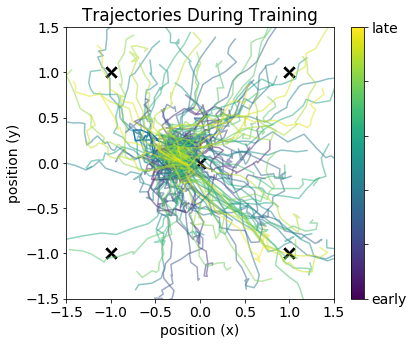

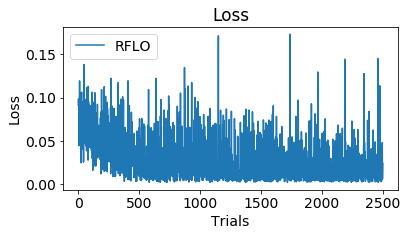

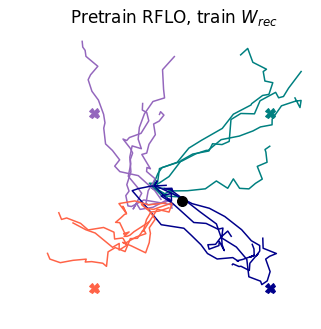

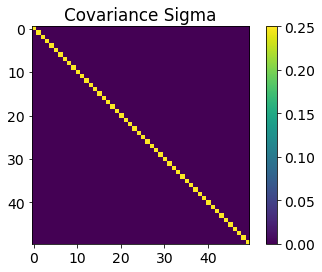

500it [00:05, 97.63it/s]
5000it [01:16, 65.24it/s]
500it [00:06, 75.72it/s]


AR early fit 0.939, late fit 0.968


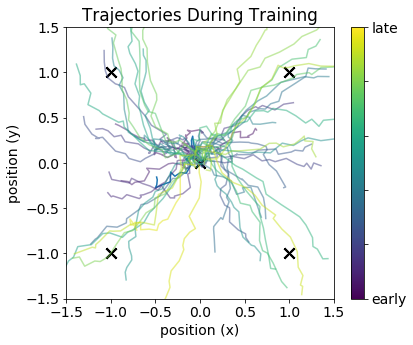

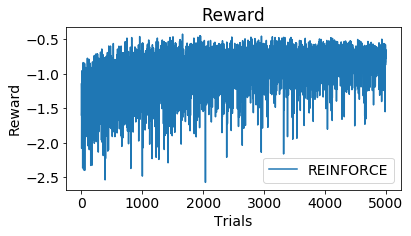

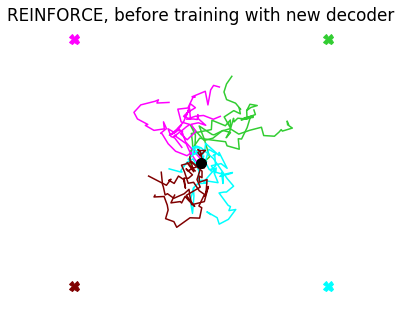

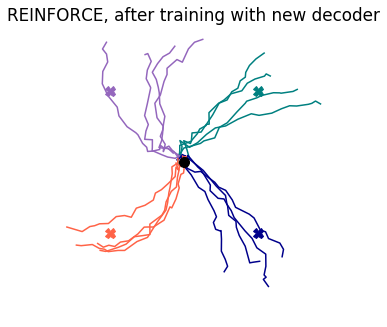

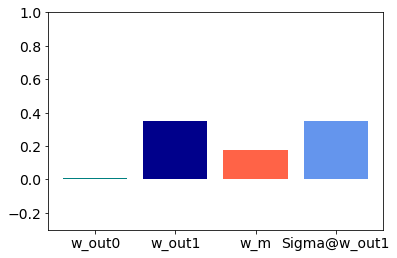

4it [00:00, 34.11it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.0
sig_rec: 0.25
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fe3f9f35048>


2500it [01:00, 41.42it/s]



~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.16	 M angle: 0.51, 45 iterations
M norm: 1.18	 M angle: 0.50, 68 iterations
 w_out1 vs. w_m_sigma angle: 0.50

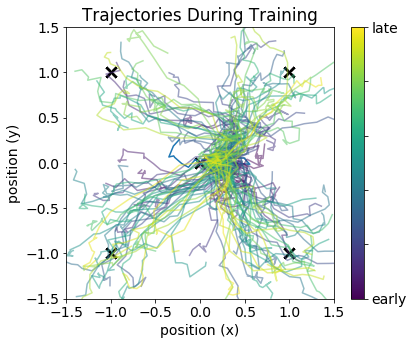

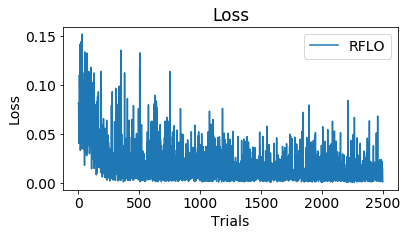

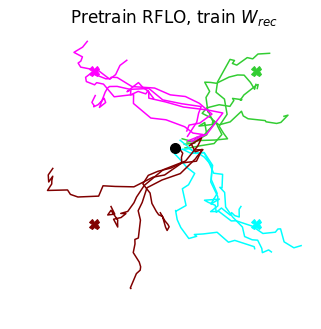

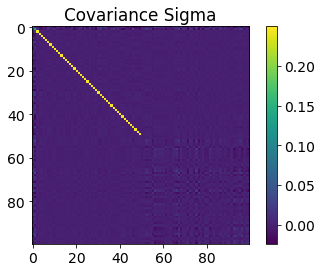

500it [00:13, 41.48it/s]
5000it [02:20, 35.50it/s]
500it [00:11, 40.07it/s]


AR early fit 0.952, late fit 0.975


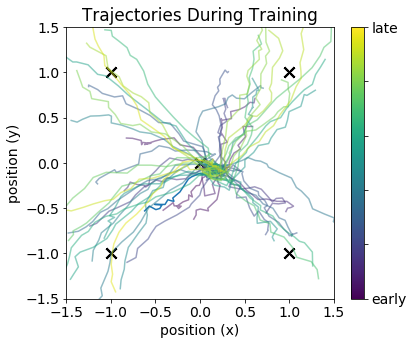

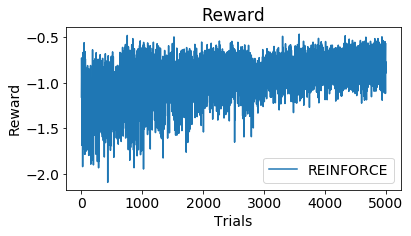

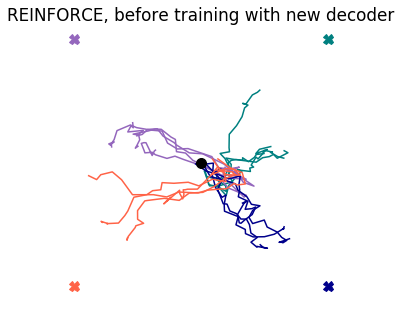

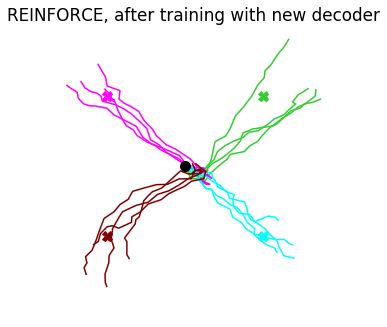

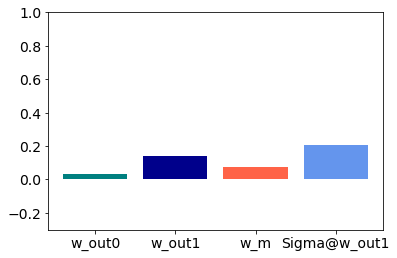

2it [00:00, 16.89it/s]

n_in: 4
n_rec: 150
n_out: 2
sig_in: 0.0
sig_rec: 0.25
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fe3fae81048>


2500it [01:58, 21.06it/s]



~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.10	 M angle: 0.50, 203 iterations
M norm: 1.11	 M angle: 0.50, 82 iterations
 w_out1 vs. w_m_sigma angle: 0.50

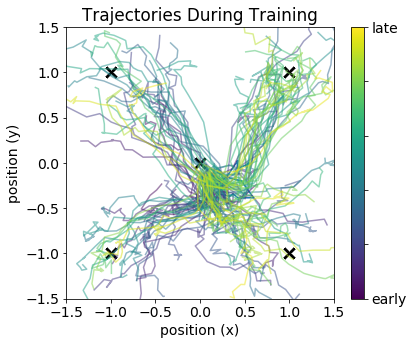

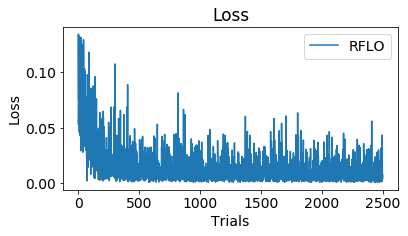

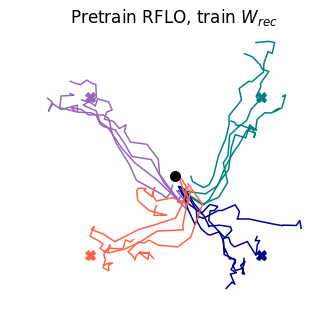

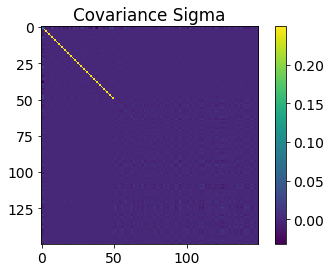

500it [00:24, 17.54it/s]
5000it [05:01, 17.30it/s]
500it [00:27, 20.98it/s]


AR early fit 0.965, late fit 0.983


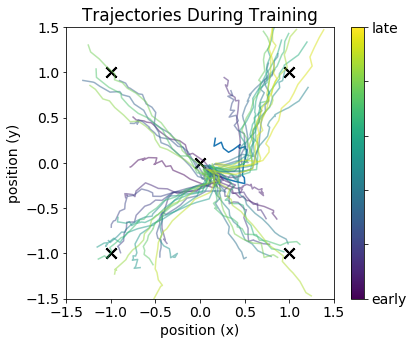

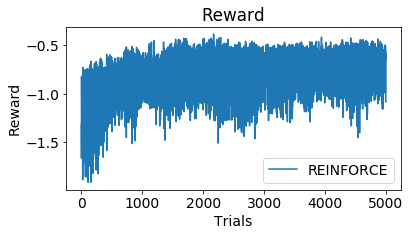

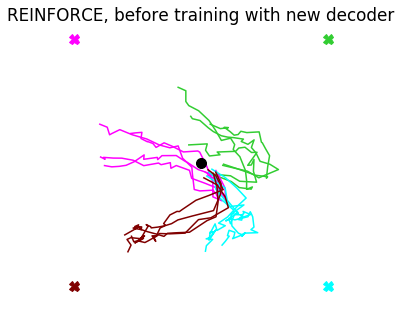

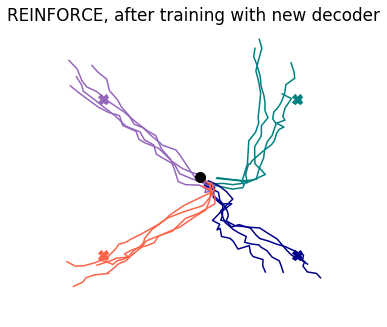

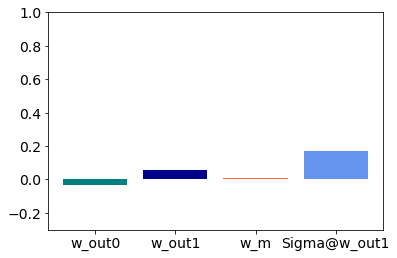

1it [00:00,  6.27it/s]

n_in: 4
n_rec: 200
n_out: 2
sig_in: 0.0
sig_rec: 0.25
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fe3fb20b120>


2500it [03:50, 11.12it/s]



~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.14	 M angle: 0.51, 185 iterations
M norm: 1.15	 M angle: 0.50, 1 iterations
 w_out1 vs. w_m_sigma angle: 0.50

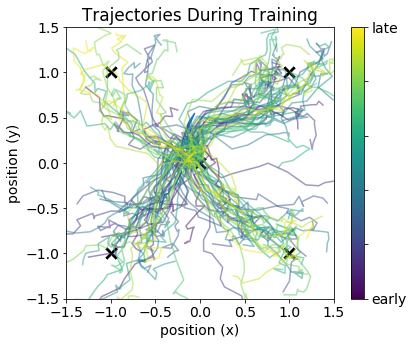

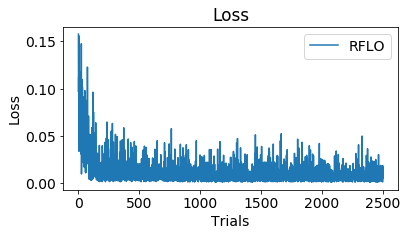

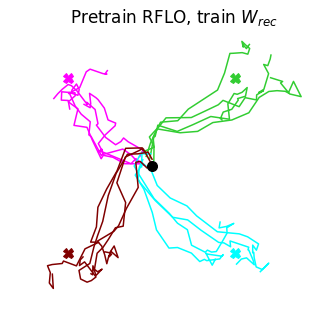

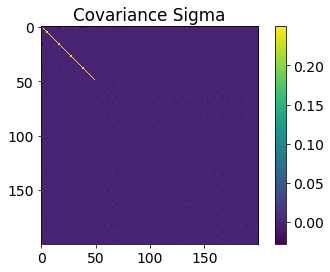

500it [00:37, 13.27it/s]
5000it [07:24, 11.25it/s]
500it [00:39, 12.56it/s]


AR early fit 0.975, late fit 0.985


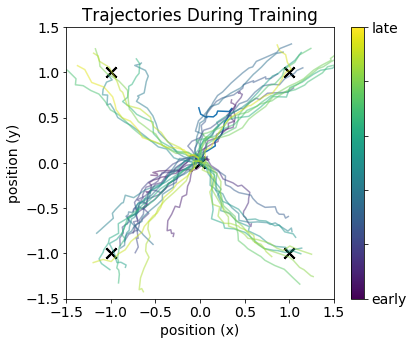

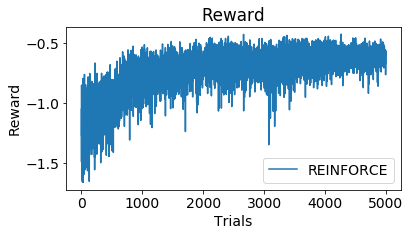

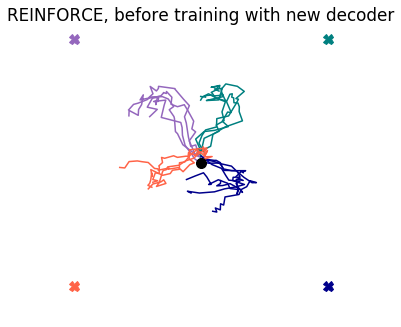

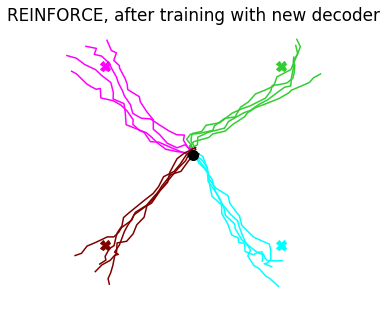

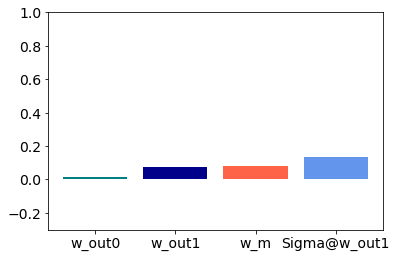

7it [00:00, 67.75it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: 0.25
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fe3fac51ea0>


2500it [00:26, 95.21it/s]



~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.11	 M angle: 0.50, 13 iterations
M norm: 1.12	 M angle: 0.51, 1 iterations
 w_out1 vs. w_m_sigma angle: 0.51

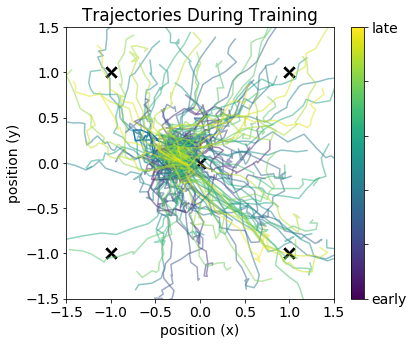

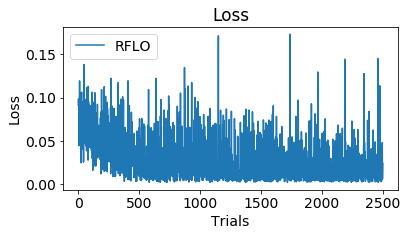

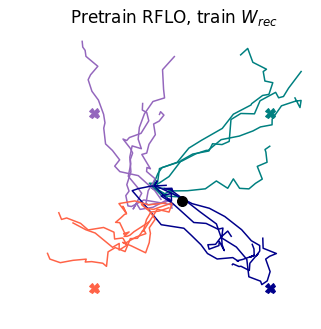

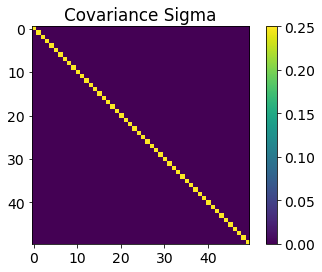

500it [00:04, 103.80it/s]
5000it [01:02, 80.45it/s]
500it [00:06, 77.58it/s]


AR early fit 0.939, late fit 0.970


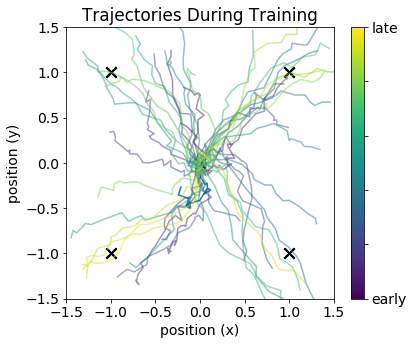

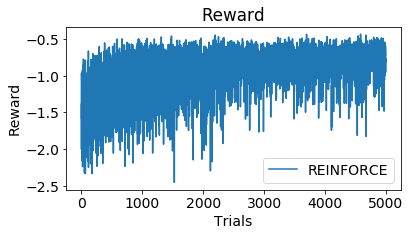

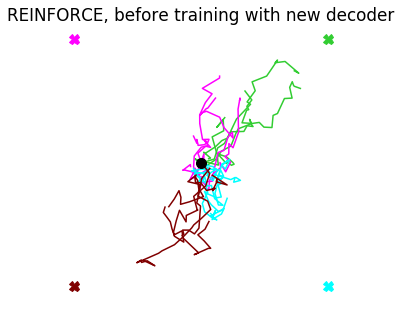

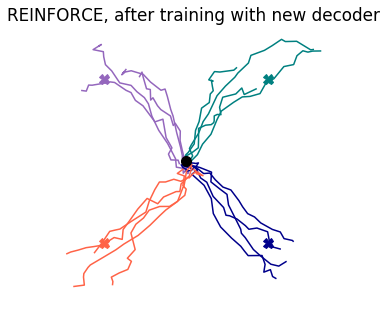

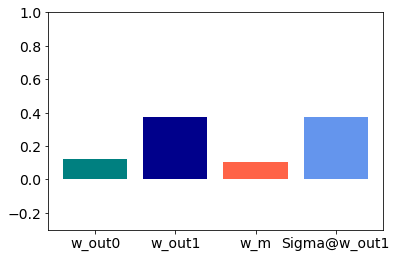

4it [00:00, 36.63it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.0
sig_rec: 0.25
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fe3fae7baf8>


2500it [00:58, 42.41it/s]



~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.14	 M angle: 0.49, 20 iterations
M norm: 1.13	 M angle: 0.51, 16 iterations
 w_out1 vs. w_m_sigma angle: 0.51

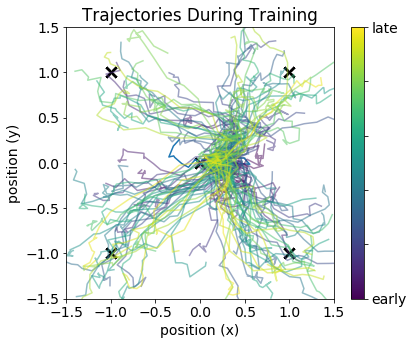

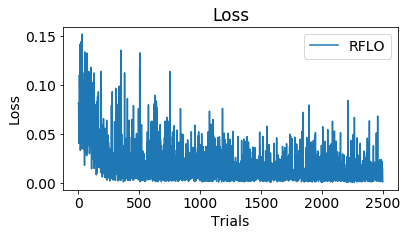

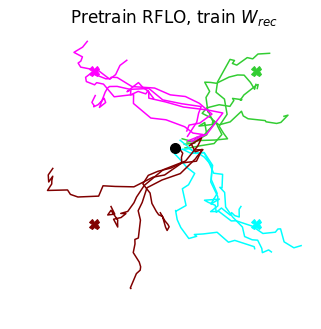

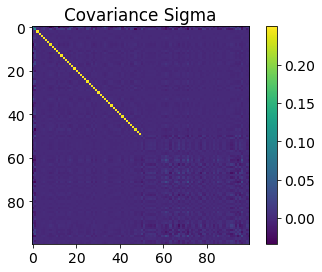

500it [00:10, 46.30it/s]
5000it [02:18, 30.86it/s]
500it [00:13, 38.36it/s]


AR early fit 0.952, late fit 0.977


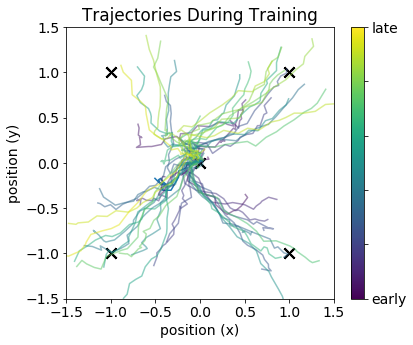

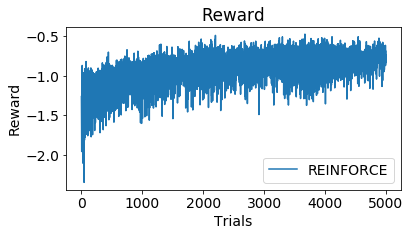

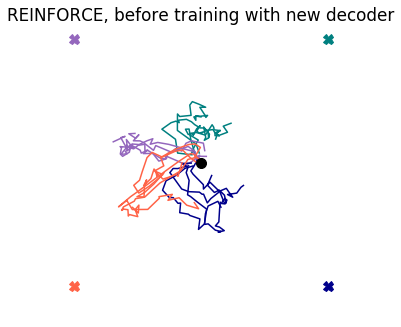

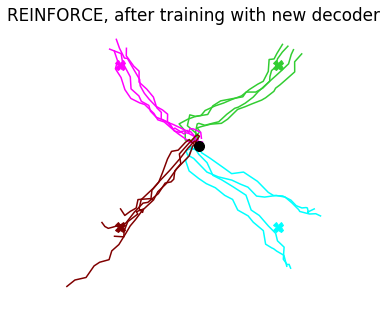

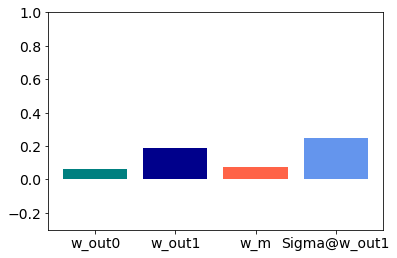

2it [00:00, 15.75it/s]

n_in: 4
n_rec: 150
n_out: 2
sig_in: 0.0
sig_rec: 0.25
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fe3f9fd2480>


2500it [01:55, 21.65it/s]



~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.13	 M angle: 0.50, 29 iterations
M norm: 1.14	 M angle: 0.50, 61 iterations
 w_out1 vs. w_m_sigma angle: 0.50

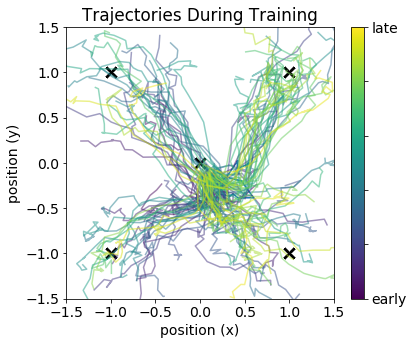

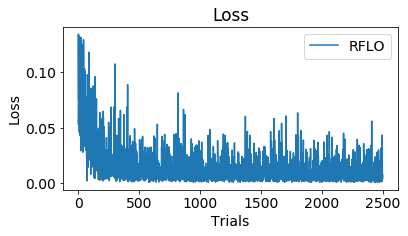

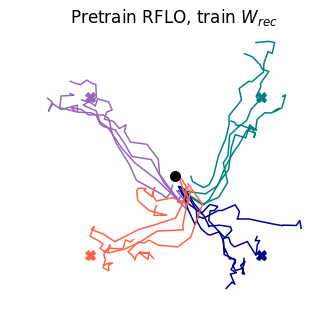

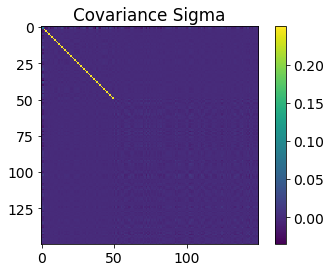

500it [00:23, 23.09it/s]
5000it [04:19, 19.24it/s]
500it [00:23, 21.01it/s]


AR early fit 0.965, late fit 0.981


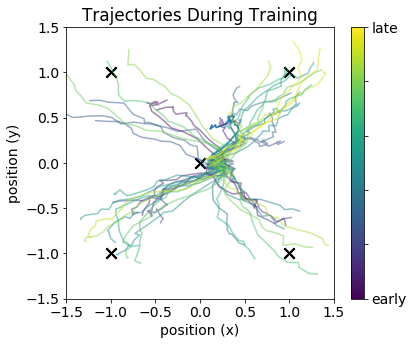

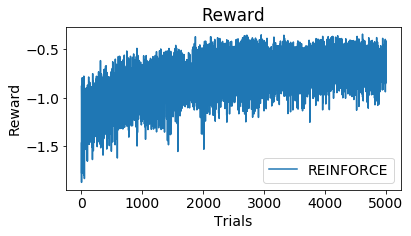

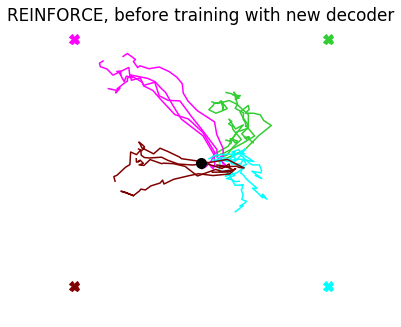

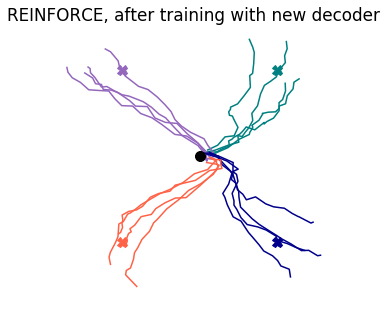

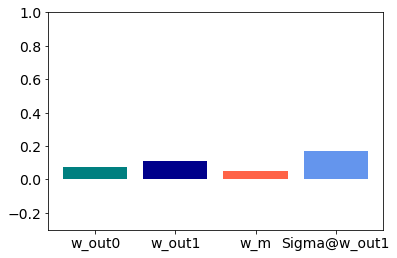

1it [00:00,  5.96it/s]

n_in: 4
n_rec: 200
n_out: 2
sig_in: 0.0
sig_rec: 0.25
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fe3e60a4750>


2500it [04:00,  7.59it/s]



~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.17	 M angle: 0.50, 1083 iterations
M norm: 1.16	 M angle: 0.51, 206 iterations
 w_out1 vs. w_m_sigma angle: 0.51

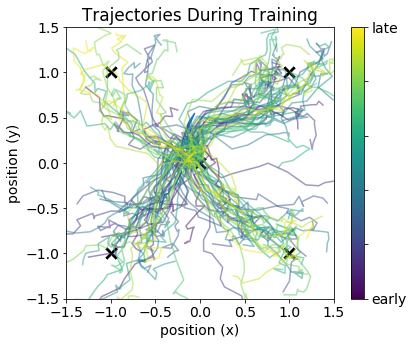

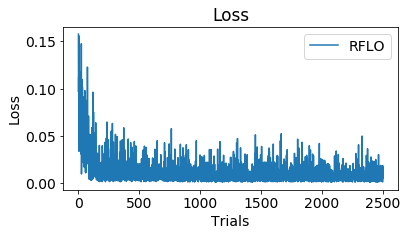

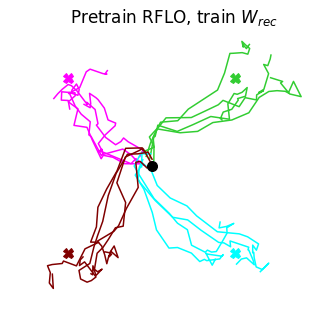

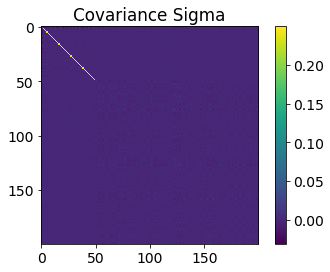

500it [01:00,  8.21it/s]
5000it [10:51,  3.99it/s]
500it [01:17,  7.47it/s]


AR early fit 0.975, late fit 0.986


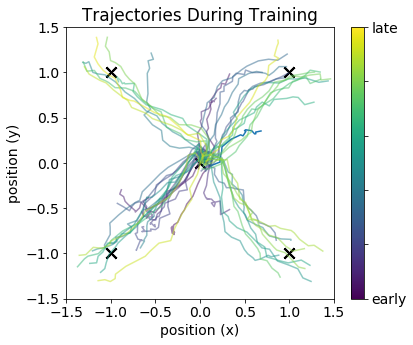

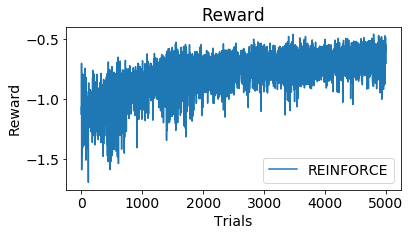

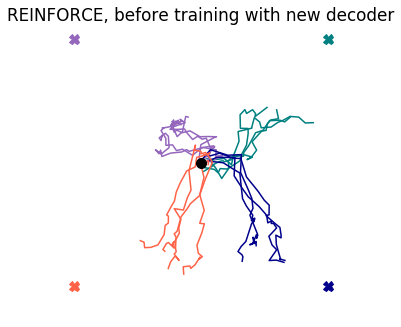

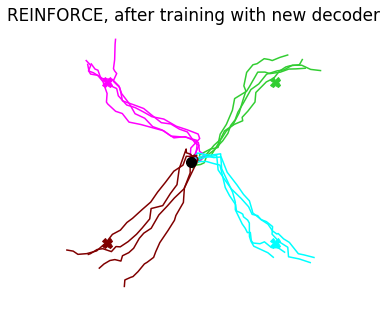

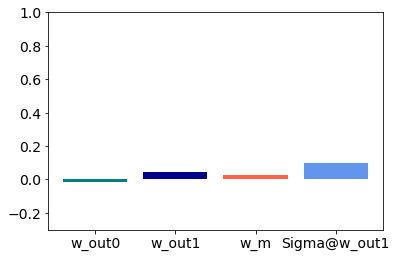

5it [00:00, 48.10it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: 0.25
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fe3fad252d0>


2500it [00:33, 74.17it/s]



~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.11	 M angle: 0.50, 0 iterations
M norm: 1.13	 M angle: 0.49, 24 iterations
 w_out1 vs. w_m_sigma angle: 0.49

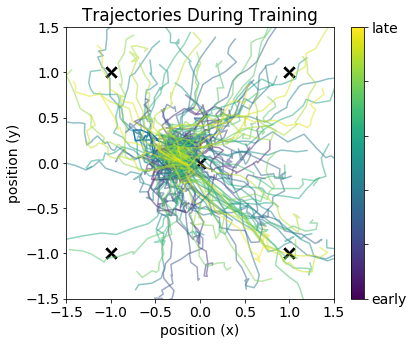

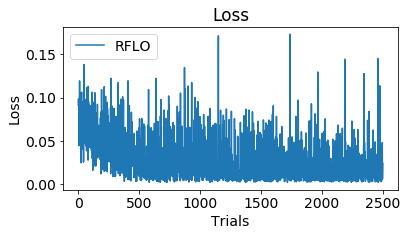

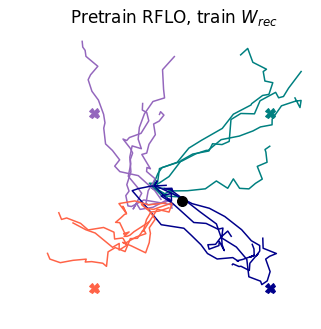

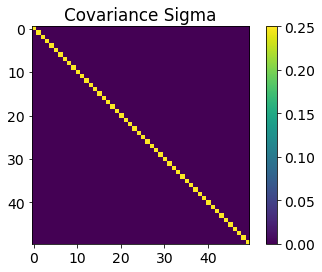

500it [00:06, 79.88it/s]
5000it [01:13, 67.80it/s]
500it [00:06, 75.35it/s]


AR early fit 0.938, late fit 0.968


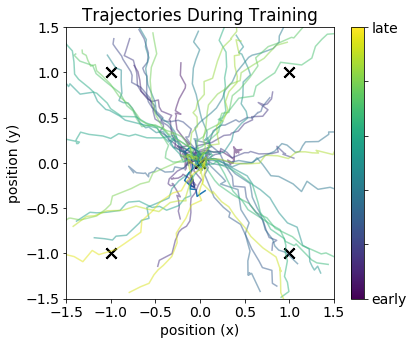

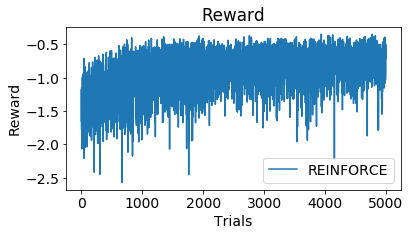

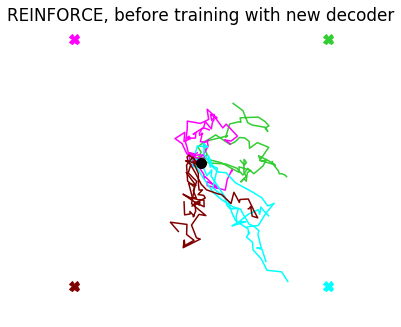

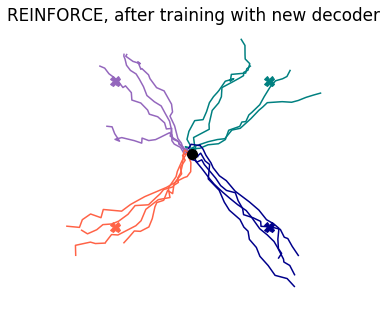

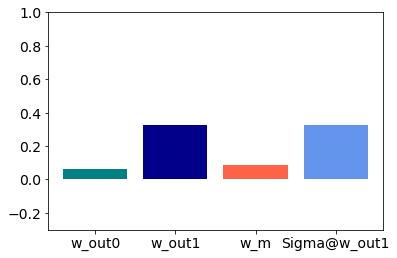

3it [00:00, 26.91it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.0
sig_rec: 0.25
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fe3faedcc60>


2500it [01:13, 30.91it/s]



~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.16	 M angle: 0.51, 65 iterations
M norm: 1.18	 M angle: 0.50, 59 iterations
 w_out1 vs. w_m_sigma angle: 0.50

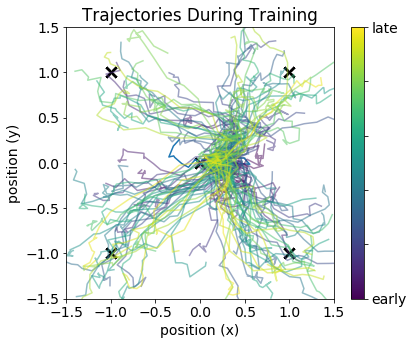

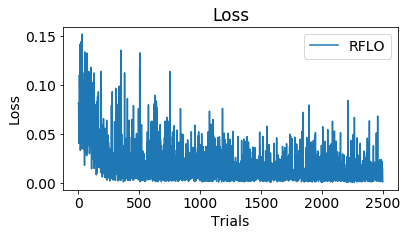

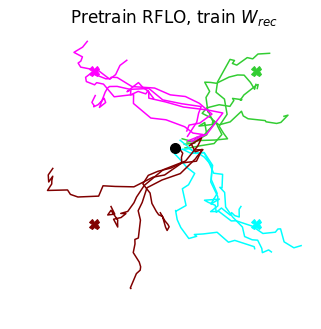

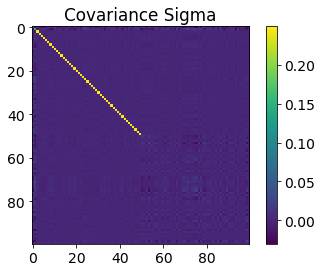

500it [00:15, 32.69it/s]
5000it [03:52, 21.49it/s]
500it [00:15, 31.50it/s]


AR early fit 0.952, late fit 0.975


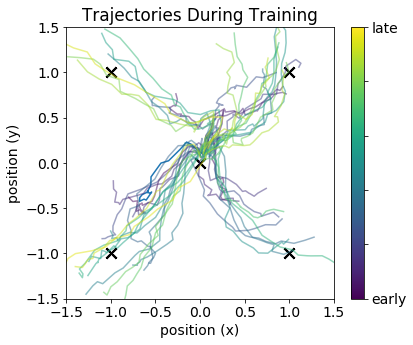

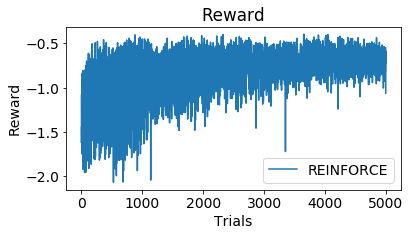

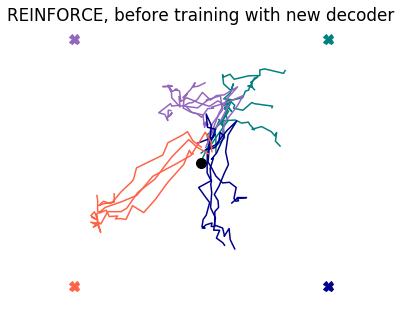

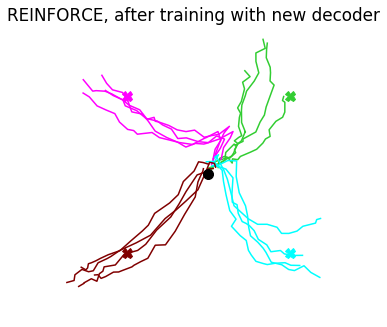

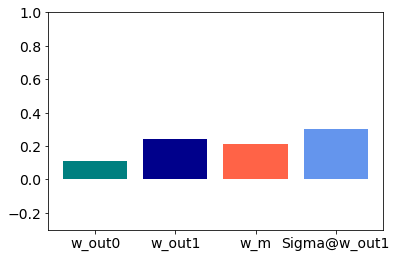

2it [00:00, 14.09it/s]

n_in: 4
n_rec: 150
n_out: 2
sig_in: 0.0
sig_rec: 0.25
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fe3faa6ee10>


2500it [02:27, 19.50it/s]



~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.14	 M angle: 0.50, 45 iterations
M norm: 1.14	 M angle: 0.51, 51 iterations
 w_out1 vs. w_m_sigma angle: 0.51

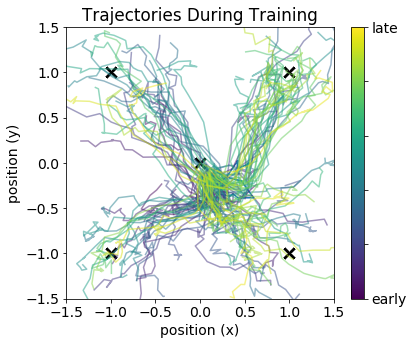

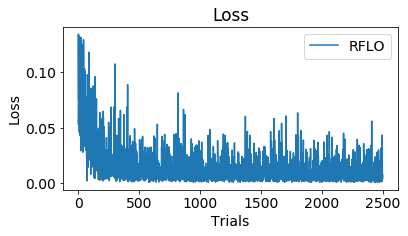

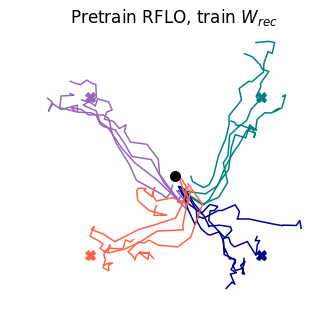

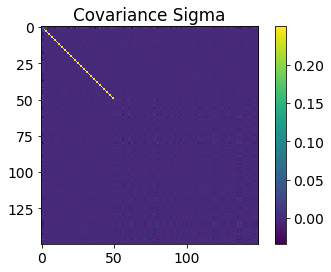

500it [00:31, 16.07it/s]
5000it [05:14, 22.09it/s]
500it [00:20, 24.88it/s]


AR early fit 0.965, late fit 0.980


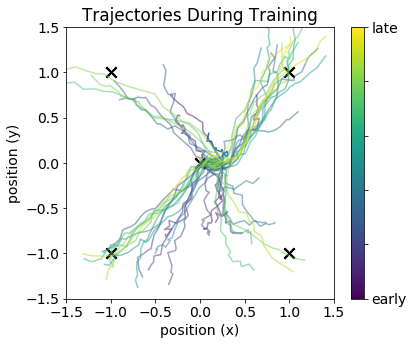

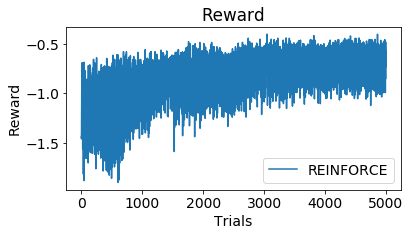

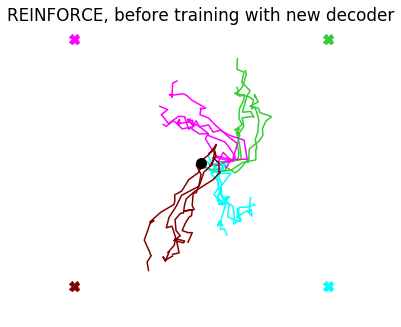

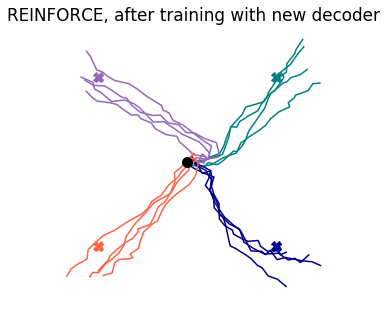

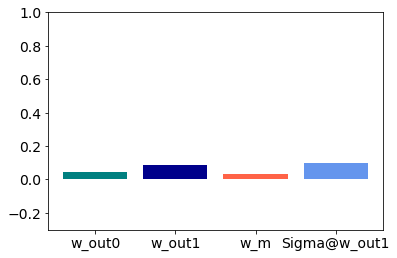

1it [00:00,  9.56it/s]

n_in: 4
n_rec: 200
n_out: 2
sig_in: 0.0
sig_rec: 0.25
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fe3e62463f0>


2500it [02:57, 14.07it/s]



~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.14	 M angle: 0.51, 132 iterations
M norm: 1.13	 M angle: 0.51, 179 iterations
 w_out1 vs. w_m_sigma angle: 0.51

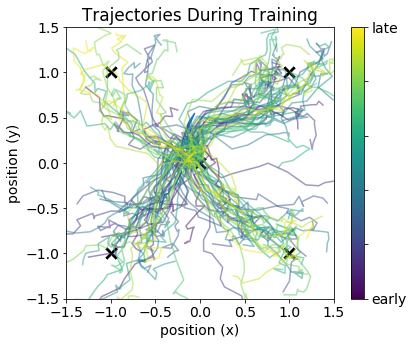

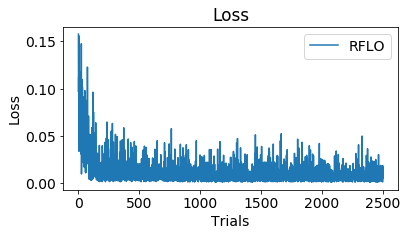

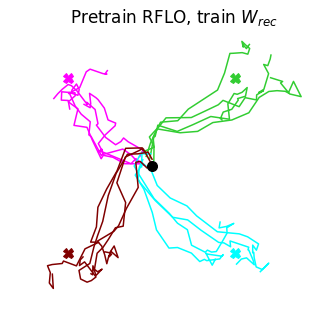

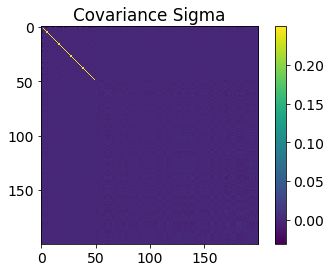

500it [00:34, 14.65it/s]
5000it [06:21, 13.24it/s]
500it [00:34, 14.65it/s]


AR early fit 0.975, late fit 0.986


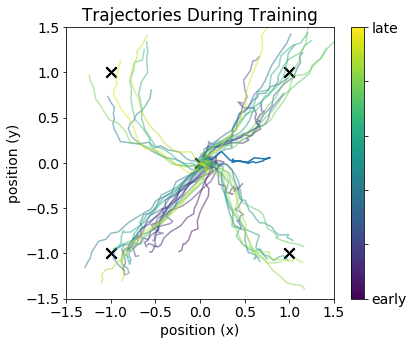

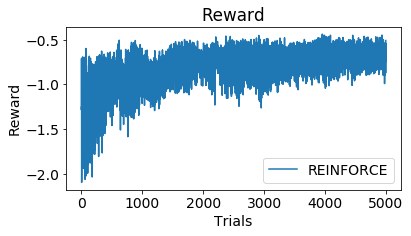

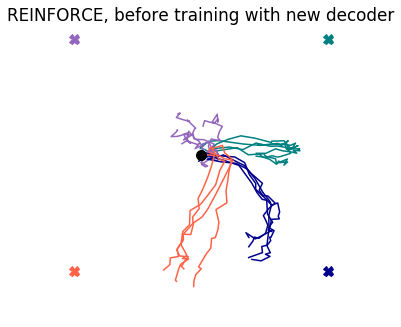

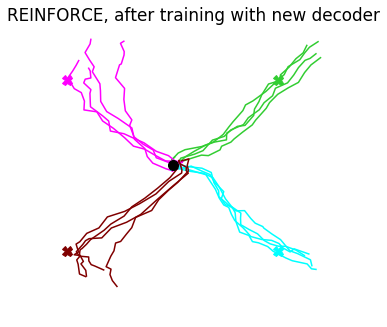

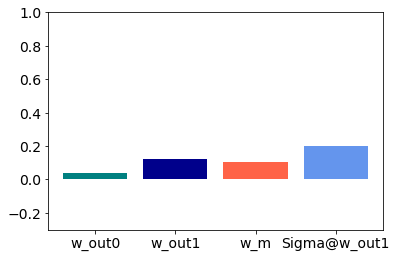

In [5]:
rnn_seed = 1889 #72

""" Average over multiple seeds """

# seeds = [0,22,33,47] #,54,72,81]
# overlaps = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
# n_changes = [75,75,60,50,50,50,30,30,1]
#overlaps = [0.4,0.5,0.6,0.7,0.8,0.9]
#n_changes = [60,50,50,40,30,5]

seeds=[568,1918,543] #22,1918,543,98] #[55,72,]


""" vary overlap between w_out and w_m_sigma that generates covariance matrix """
# overlaps = [0.4,0.6,0.8]
# n_changes = [60,50,30]

# overlap = 0.6
# n_change = 50

n_units = [50,100,150,200] # 
overlap_w_out0 = 0.5
n_changes_w_out0 = [50,100,150,200] # 


pretrain_duration = 2500 #00
train_duration=5000 #5000

overlap_w_m = 0.5 # We want W_m to be the same as wbmi1 here, so learning can occur with REINFORCE
n_changes_w_m = [50,100,150,200] 

vary_sigma_wout1 = True

dim=50





stats = {}
stats['corr1'] = []
stats['corr2'] = []
stats['corr3'] = []
stats['corr4'] = []
stats['corrcoef'] = []


stats['seeds'] = seeds
#stats['overlap'] = overlap
stats['overlap_w_m'] = overlap_w_m


for seed in seeds:

    corr1_list = []
    corr2_list = []
    corr3_list = []
    corr4_list = []
    corrcoef_list = []
    

    #for overlap,n_change in zip(overlaps,n_changes):
    #for dim in dimensions:
    for n_rec,n_change_w_out0,n_change_w_m in zip(n_units,n_changes_w_out0,n_changes_w_m):
        
        # Set RNN Parameters
        params = RNNparams(n_in=4,n_rec=n_rec,n_out=2,tau_rec=10,
                       eta_in=0.1,eta_rec=0.2,eta_out=0.1,
                       sig_in=0.0,sig_rec=0.25,sig_out=0.01,
                       velocity_transform=False, tau_vel = 0.8, dt_vel = 0.1,
                       rng=np.random.RandomState(rnn_seed))
        params.print_params()

        
        
        # Initialize RNN, train with RFLO
        net0 = RNN(params)
        sim0 = Simulation(net0)
        rflo = RFLO(net0,apply_to=['w_rec'],online=False)
        sim0.run_session(n_trials=pretrain_duration, tasks=[task1,task2,task3,task4], learn_alg=[rflo], probe_types=['loss'], plot=True, plot_freq=20)

        fig0 = plot_trained_trajectories(sim=sim0, tasks=[task1,task2,task3,task4],title='Pretrain RFLO, train '+r'$W_{rec}$')


        
        
        
        print('\n~~~~ OVERLAP w_out1 wout0 {}, OVERLAP w_out1 w_m SEED {}'.format(overlap_w_out0,overlap_w_m,seed))
        print('\n')
        
        """ choose new decoder w_out1, change overlap """
        w_out1 = choose_aligned_matrix(net0.w_out.copy(),n_change=n_change_w_out0,overlap=overlap_w_out0,rng=np.random.RandomState(seed),zero=False,tolerance=0.01,loop=500000)
        #""" choose new internal model w_m, keep constant """
        w_m = choose_aligned_matrix(w_out1.copy(),n_change=n_change_w_m,overlap=overlap_w_m,rng=np.random.RandomState(seed+1272),zero=False,tolerance=0.01,loop=500000)

        
        # confirm overlap between w_out1 and w_out
        norm, angle = return_norm_and_angle(net0.w_out,w_out1)
        print('\nw_out1 norm: {:.2f}'.format(norm) + '\t w_out vs. w_out1 angle: {:.2f}'.format(angle),end='')

#         # confirm overlap between w_out1 and w_m
#         norm, angle = return_norm_and_angle(w_out1,w_m)
#         print('\nw_m norm: {:.2f}'.format(norm) + '\t w_out1 vs. w_m angle: {:.2f}'.format(angle),end='')

#         # confirm overlap between w_out and w_m
#         norm, angle = return_norm_and_angle(net0.w_out,w_m)
#         print('\nw_m norm: {:.2f}'.format(norm) + '\t w_out vs. w_m angle: {:.2f}'.format(angle),end='')
        
        
        
        """ Version 1 - use w_m, find sigma that is partially aligned, and generate covariance matrix """
        #w_m_sigma = choose_aligned_matrix(w_m,n_change=n_change,overlap=overlap,rng=np.random.RandomState(seed),zero=False,tolerance=0.01,loop=1000)
        
        """ Version 2 - Use w_out1, find sigma that is partially aligned, and generate covariance matrix """
        if vary_sigma_wout1:
            w_m_sigma = choose_aligned_matrix(w_out1,n_change=n_change_w_m,overlap=overlap_w_m,rng=np.random.RandomState(seed+3466),zero=False,tolerance=0.01,loop=100000)
        
        
#         _, angle = return_norm_and_angle(w_m,w_m_sigma)
#         print('\n w_m vs. w_m_sigma angle: {:.2f}'.format(angle),end='')
        _, angle = return_norm_and_angle(w_out1,w_m_sigma)
        print('\n w_out1 vs. w_m_sigma angle: {:.2f}'.format(angle),end='')
        
        
        """ Choose Noise Covariance """
        Q,R = LA.qr(w_m_sigma.T)
        u0 = Q[:,0]
        u1 = Q[:,1]
        Sigma = np.outer(u0,u0) + np.outer(u1,u1)

        for d in range(2,dim):
            u = Q[:,d]
            Sigma += np.outer(u,u)
            
        #Sigma /= dim # Do I need to do this? NO
        """multiply by sig_rec (since I don't do this in code)"""
        Sigma *= net0.sig_rec
        
        fig,ax = plt.subplots(1,1)
        plt.imshow(Sigma)
        plt.title('Covariance Sigma')
        plt.colorbar()
        plt.show()
        
        
        net2_pre = RNN(params,sig_rec_covariance=Sigma)
        net2_pre.set_weights(w_in=net0.w_in.copy(), w_rec=net0.w_rec.copy())
        net2_pre.set_weights(w_out = w_out1)
        net2_pre.set_weights(w_m = 0*w_m_sigma.T) # shouldn't matter for REINFORCE

        # unfortunately I need to make a different network to maintain integrity of pre and post simulations for plotting
        net2 = RNN(params,sig_rec_covariance=Sigma)
        net2.set_weights(w_in=net0.w_in.copy(), w_rec=net0.w_rec.copy())
        net2.set_weights(w_out = w_out1)
        net2.set_weights(w_m = 0*w_m_sigma.T) # shouldn't matter for REINFORCE



        """ Track activity with new decoder, before training """

        sim2_pre = Simulation(net2_pre)
        trackvars = TrackVars(net2_pre,apply_to=[]) 
        sim2_pre.run_session(n_trials=500, tasks=[task1,task2,task3,task4], learn_alg=[trackvars], probe_types=['h','err'], plot=False, plot_freq=10)
        #fig = plot_trained_trajectories(sim=sim1_pre, tasks=[task1,task2,task3,task4],title='RFLO, before training with new decoder')

        """ Train with new decoder """

        sim2_train = Simulation(net2)
        reinforce = REINFORCE(net2,apply_to=['w_rec'],online=False,tau_reward=5)
        sim2_train.run_session(n_trials=train_duration, tasks=[task1,task2,task3,task4], learn_alg=[reinforce], probe_types=['h','reward','err'], plot=True, plot_freq=100)

        """ Track activity with new decoder, after training """
        net2_post = RNN(params,sig_rec_covariance=Sigma)
        net2_post.set_weights(w_in=net2.w_in.copy(), w_rec=net2.w_rec.copy())
        net2_post.set_weights(w_out = net2.w_out)
        net2_post.set_weights(w_m = 0*net2.w_m) # shouldn't matter for REINFORCE

        sim2_post = Simulation(net2_post)
        trackvars = TrackVars(net2_post,apply_to=[]) 
        sim2_post.run_session(n_trials=500, tasks=[task1,task2,task3,task4], learn_alg=[trackvars], probe_types=['h','err'], plot=False, plot_freq=10)

        
        fig = plot_trained_trajectories(sim=sim2_pre, tasks=[task1,task2,task3,task4],title='REINFORCE, before training with new decoder')

        fig = plot_trained_trajectories(sim=sim2_post, tasks=[task1,task2,task3,task4],title='REINFORCE, after training with new decoder')
        
        
        """ Calculate F fields """
        F_early, score_early = flow_field_data(sim2_pre.session_probes['h'])
        F_late, score_late = flow_field_data(sim2_post.session_probes['h'])

        print('AR early fit {:.3f}, late fit {:.3f}'.format(score_early,score_late))

        Fdata = F_late - F_early

        # separate train and test data from sim1_train
        n_total = len(sim2_train.session_probes['h'])
        n_train = int(0.5 * n_total)
        idx_train = np.random.RandomState(1975+seed).choice(np.arange(0,n_total),size=n_train,replace=False).astype(int)
        idx_test = np.arange(0,n_total)[~idx_train].astype(int)
        #idx_test=idx_train

        h_train = np.asarray(sim2_train.session_probes['h'])[idx_train,:,:,:]
        err_train = np.asarray(sim2_train.session_probes['err'])[idx_train,:,:,:]

        Fpred_w_out = flow_field_predicted(net0.w_out,err_train,h_train)
        Fpred_w_out1 = flow_field_predicted(w_out1,err_train,h_train)
        Fpred_w_m = flow_field_predicted(w_m,err_train,h_train) # note w_m_sigma here
        Fpred_cov_w_out1 = flow_field_predicted(w_out1@Sigma.T,err_train,h_train) # nonisotropic noise, wout1 is tranposed inside function

        h_test = np.asarray(sim2_train.session_probes['h'])[idx_test,:,:,:]

        corr1 = calculate_flow_field_correlation(Fpred_w_out,Fdata,h_test) # could also sample sim_test
        corr1_list.append(corr1)

        corr2 = calculate_flow_field_correlation(Fpred_w_out1,Fdata,h_test) # could also sample sim_test
        corr2_list.append(corr2)

        corr3 = calculate_flow_field_correlation(Fpred_w_m,Fdata,h_test) # could also sample sim_test
        corr3_list.append(corr3)
        
        corr4 = calculate_flow_field_correlation(Fpred_cov_w_out1,Fdata,h_test) # could also sample sim_test
        corr4_list.append(corr4)
        
        fig,ax = plt.subplots(1,1)
        plt.bar([0,1,2,3],[corr1,corr2,corr3,corr4],tick_label=['w_out0','w_out1','w_m','Sigma@w_out1'],color=['teal','darkblue','tomato','cornflowerblue'])
        plt.ylim([-0.3,1])
        plt.show()
        
        
        
        
        
        
    # update
    stats['corr1'].append(corr1_list)
    stats['corr2'].append(corr2_list)
    stats['corr3'].append(corr3_list)
    stats['corr4'].append(corr4_list)
    #stats['corrcoef'].append(corrcoef_list)
    


In [ ]:
# SAVE THE CORRECT UNITS/NAME!!!

In [7]:
""" save stats """
stats_reinforce_n_units = stats

save = True
tag = '6-26-dim50'

if save:
    
    with open(folder+'stats_reinforce_n_units-'+tag+'.pickle', 'wb') as handle:
        pickle.dump(stats_reinforce_n_units, handle, protocol=pickle.HIGHEST_PROTOCOL)

        print('>>>save stats_reinforce_n_units')

>>>save stats_reinforce_n_units


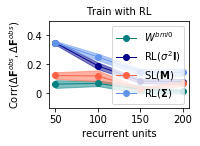

In [10]:
""" Same plot using flow field """
paper = True
save = True

tag = '-6-26-dim50'


fig,ax = plt.subplots(1,1,figsize=(6,4))

n_samples = len(stats['corr1'])
mn1 = np.mean(np.asarray(stats['corr1']),axis=0)
std1 = np.std(np.asarray(stats['corr1']),axis=0)
sem1 = std1/np.sqrt(n_samples)

mn2 = np.mean(np.asarray(stats['corr2']),axis=0)
std2 = np.std(np.asarray(stats['corr2']),axis=0)
sem2 = std2/np.sqrt(n_samples)

mn3 = np.mean(np.asarray(stats['corr3']),axis=0)
std3 = np.std(np.asarray(stats['corr3']),axis=0)
sem3 = std3/np.sqrt(n_samples)

mn4 = np.mean(np.asarray(stats['corr4']),axis=0)
std4 = np.std(np.asarray(stats['corr4']),axis=0)
sem4 = std4/np.sqrt(n_samples)

plt.plot(n_units,mn1,'o-',linewidth=1,label=r'$W^{bmi0}$',color='teal')
plt.fill_between(n_units,mn1-sem1,mn1+sem1,alpha=0.5,color='teal')


plt.plot(n_units,mn2,'o-',linewidth=1,label='RL('+r'$\sigma^2 \mathbf{I})$',color='darkblue')
plt.fill_between(n_units,mn2-sem2,mn2+sem2,alpha=0.5,color='darkblue')

plt.plot(n_units,mn3,'o-',linewidth=1,label='SL('+r'$\mathbf{M})$',color='tomato')
plt.fill_between(n_units,mn3-sem3,mn3+sem3,alpha=0.5,color='tomato')

plt.plot(n_units,mn4,'o-',linewidth=1,label='RL('+r'$\mathbf{\Sigma}$)',color='cornflowerblue')
plt.fill_between(n_units,mn4-sem4,mn4+sem4,alpha=0.5,color='cornflowerblue')

#plt.axhline(y=overlap_w_m,linestyle='--',label='overlap w_m w_out1')
plt.ylim([-0.2,.4])
plt.legend()
plt.title('Train with RL')
#plt.xlabel('alignment '+r'$M \angle W^{bmi1}$')
plt.xlabel('recurrent units')
plt.ylabel('Corr'+r'$(\Delta \mathbf{F}^{obs}, \Delta \mathbf{F}^{obs})$')

plt.tight_layout()

if paper:
    fig,ax = paper_format(fig=fig,ax=ax,xlabels=n_units,ylabels=[0,0.2,0.4,0.6],ticksize=10,linewidth=2,ylim=[-.1,0.5],figsize=(2.25,3),labelsize=10)

plt.show()

if save:
    if paper:
        fig.savefig(folder+'reinforce-dF-n_units'+tag+'.pdf')
    else:
        fig.savefig(folder+'reinforce-dF-n_units'+tag+'.pdf')
        
        #RUN AGAIN WITH 0.5


In [8]:
n_units

[50, 100, 200]